## 確認 GPU 是否存在??

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())

1.12.0+cu116
True
1


## 載入模組

In [2]:
from torchvision.datasets import MNIST
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import transforms


## 設定參數

In [3]:
PATH_DATASETS=""
BATCH_SIZE=1000
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## 下載資料集

In [4]:
train_dataset = MNIST(PATH_DATASETS, train=True, download=True, transform=transforms.ToTensor())

test_dataset = MNIST(PATH_DATASETS, train=False, download=True, transform=transforms.ToTensor())

print(train_dataset.train_data.shape, test_dataset.test_data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


C:\Users\mille\AppData\Roaming\Python\Python39\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\mille\AppData\Roaming\Python\Python39\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [5]:
train_dataset.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [6]:
train_dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

## 把數字畫出來

torch.Size([28, 28])


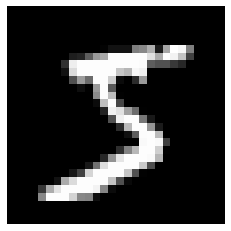

In [7]:
import matplotlib.pyplot as plt
X=train_dataset.data[0]
print(X.shape)
plt.imshow(X.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

## 建立模型

In [8]:
# 建立模型

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28*28, 256),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(256, 10),
).to(device)

## 設置參數, 建立 DataLoader, 建立優化器, 建立損失函數

In [9]:
# 設置參數

epochs = 5
lr=0.1

#建立DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# 建立優化器
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)

# 建立损失函數
criterion = torch.nn.CrossEntropyLoss()

## 開始訓練

In [10]:
# 訓練

model.train()
loss_list = []
for epoch in range(1, epochs+1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch=batch_idx*len(data)
            data_count=len(train_loader.dataset)
            percentage=(100*batch_idx/len(train_loader))
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314096
Train Epoch: 1 [10000/60000 (17%)]	Loss: 2.043591
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.769627
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.517929
Train Epoch: 1 [40000/60000 (67%)]	Loss: 1.303544
Train Epoch: 1 [50000/60000 (83%)]	Loss: 1.140651
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.025574
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.890011
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.772522
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.722616
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.662002
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.637681
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.589492
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.590221
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.551166
Train Epoch: 3 [30000/60000 (50%)]	Loss: 0.522143
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.515495
Train Epoch: 3 [50000/60000 (83%)]	Loss: 0.454556
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.517617
Train Epoch: 4 [10000/60000 (17%)]	Loss: 0.493825
Train Epoch: 4 [2000

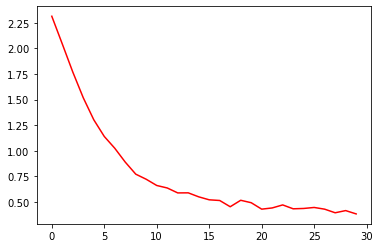

In [11]:
plt.plot(loss_list, 'r')

## 評估模型

In [12]:
# 評估模型
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_dataloader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        # 加總我們的batch_loss
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

#平均loss
test_loss /= len(test_dataloader.dataset)

batch=batch_idx*len(data)
data_count=len(test_dataloader.dataset)
percentage=(100*correct/data_count)
print(f'平均損失: {test_loss:.4f}, 準確率: {correct}/{data_count}' + 
      f' ({percentage:.0f}%)\n')


平均損失: 0.0004, 準確率: 8991/10000 (90%)



## 比較前幾筆

In [14]:
# 比對前幾筆

# 實際預測 20 筆資料
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_dataset[i][0], test_dataset[i][1]
        data = data.reshape(1, *data.shape).to(device)
        output = torch.argmax(model(data), axis=-1)
        # print("output:", output)
        # print("output.item():", output.item())
        predictions.append(str(output.item()))

# 比對
print('actual    :', test_dataset.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))

actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction:  7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4


## 把差異 (第九筆資料) 結果dump出來

In [15]:
# 第9筆資料

import numpy as np

i=8
data = test_dataset[i][0]
print("test_dataset[i][0]:", data)
print("test_dataset[i][0].shape:", data.shape)
data = data.reshape(1, *data.shape).to(device)
#print(data.shape)
predictions = torch.softmax(model(data), dim=1)
print(f'0~9預測機率: {np.around(predictions.cpu().detach().numpy(), 2)}')
print(f'0~9預測機率: {np.argmax(predictions.cpu().detach().numpy(), axis=-1)}')


test_dataset[i][0]: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0

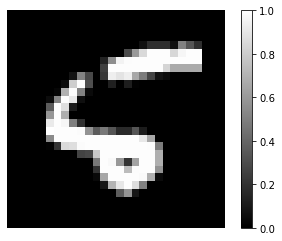

In [16]:
X2=test_dataset[i][0]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

## 模型保存

In [16]:
#模型保存
torch.save(model, 'model.pt')

#模型載入
torch.load('model.pt')

#權重保存
torch.save(model.state_dict(), 'model.pth')

#權重載入
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [22]:
!pip install scikit-image


     --------------------------------------- 12.2/12.2 MB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.1 MB/s eta 0:00:00
     -------------------------------------- 195.6/195.6 kB 5.8 MB/s eta 0:00:00
     --------------------------------------- 36.9/36.9 MB 10.2 MB/s eta 0:00:00


## 用小畫家手寫辨識

In [17]:
from skimage import io
from skimage.transform import resize
import numpy as np

for i in range(1,5):
    upload_img = f'./MyDigit/{i}.png'
    image1 = io.imread(upload_img, as_gray=True)
    #縮成28x28
    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 =image_resized.reshape(1, 28,28)
    X1 = torch.FloatTensor(1.0-X1).to(device)
    predictions = torch.softmax(model(X1), dim=1)
    print(f'實際/預測: {i} {np.argmax(predictions.detach().cpu().numpy())}')


實際/預測: 1 1
實際/預測: 2 2
實際/預測: 3 8
實際/預測: 4 4


In [18]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=10, bias=True)
)
